Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Bishal Khanal"
ID = "st122221"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

### Example 1: Root finding for a cubic polynomial

Let's begin by using Newton's method to find roots of a simple cubic
polynomial $$ f(x) = x^3 + x^2 .$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Here's a function to evaluate a polynomial created with Numpy's `poly1d` function
at a particular point $x$:

In [3]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

And here's some code to create the polynomial $x^3 + x^2$, get its derivative, and evalute
the derivative at 200 points along the $x$ axis:;

In [4]:
# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [1 * x^3, 1 * x^2, 0 * x^1, 0 * 1]

# Get f'(x) (the derivative of f(x) in polynomial form)
# We know it's 2x^2 + 2x, which is [3, 2, 0] in poly1d form
p_d = np.polyder(p)

print('f(x):')
print('----------')
print(p)
print('----------')
print("f'(x):")
print('----------')
print(p_d)
print('----------')

# Get 200 points along the x axis between -3 and 3
n = 200
x = np.linspace(-3, 3, n)  

# Get values for f(x) and f'(x) in order to graph them later
y = fx(x, p)
y_d = fx(x,p_d)

f(x):
----------
   3     2
1 x + 1 x
----------
f'(x):
----------
   2
3 x + 2 x
----------


Next, let's try three possible guesses for $x_0$: -3, 1, and 3, and in each case, run
Newton's root finding method from that initial guess.

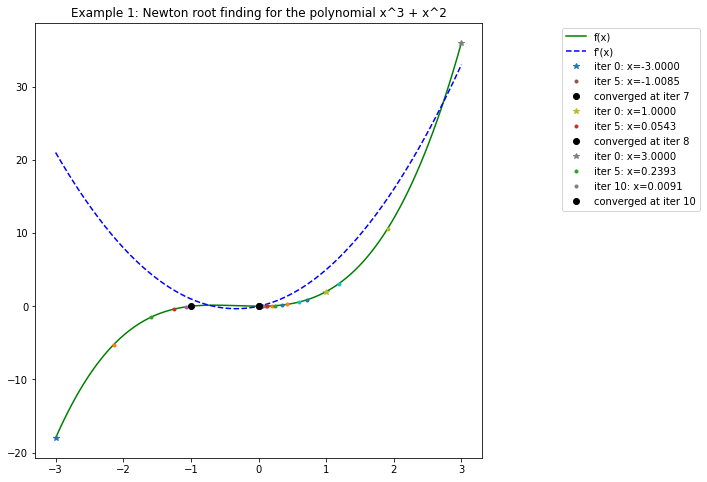

In [5]:
# Initial guesses
x0_arr = [-3.0, 1.0, 3.0]

# Parameters for Newton: number of iterations,
# threshold for identifying a point as a zero
max_iters = 30
threshold = 0.0001

# Set up plot
fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f'(x)")

roots = []
for x0 in x0_arr:
    i = 0
    xi = x0
    fxi = fx(xi, p)
    # Plot initial data point
    plt.plot(xi, fxi, '*', label=("iter 0: x=%.4f" % x0))
    while i < max_iters:
        # x_i+1 = x_i - f(x_i)/f'(x_i)
        xi = xi - fx(xi, p) / fx(xi, p_d)
        fxi = fx(xi, p)
        # Plot (xi, fxi) and add a legend entry every 5 iterations
        if (i+1) % 5 == 0:
            plt.plot(xi, fxi, '.', label=("iter %d: x=%.4f" % (i+1, xi)))
        else:
            plt.plot(xi, fxi, '.')        
        # Check if |f(x)| < threshold
        if np.abs(fxi) < threshold:
            roots.append(xi)
            break
        i = i + 1
    plt.plot(xi, fx(xi, p), 'ko', label=("converged at iter %d" % (i+1)))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
plt.title('Example 1: Newton root finding for the polynomial x^3 + x^2')

plt.show()

### Example 2: Root finding for the sine function

Next, consider the function $f(x) = \sin(x)$:

In [6]:
def fx_sin(x):  
    return np.sin(x)        

def fx_dsin(x):    
    return np.cos(x)

Let's get 200 points in the range $[-\pi, \pi]$ for plotting:

In [7]:
# Get f(x)=sin(x) and f'(x) at 200 points for plotting
n = 200
x = np.linspace(-np.pi, np.pi, n)  
y = fx_sin(x)
y_d = fx_dsin(x)

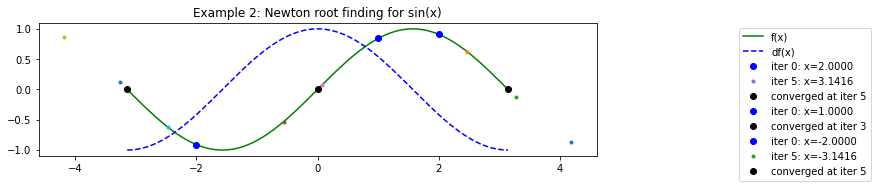

Roots: 3.141593, -0.000096, -3.141593


In [8]:
# Initial guesses
x0_arr = [2.0, 1.0, -2.0]

# Parameters for Newton: number of iterations,
# threshold for identifying a point as a zero
max_iters = 30
threshold = 0.0001

# Set up plot
fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect='equal', adjustable='box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

roots = []
for x0 in x0_arr:
    i = 0;
    xi = x0
    fxi = fx_sin(xi)
    # Plot initial data point
    plt.plot(xi, fxi, 'bo', label=("iter 0: x=%.4f" % x0))
    while i < max_iters:
        # x_i+1 = x_i - f(x_i)/f'(x_i)
        xi = xi - fx_sin(xi) / fx_dsin(xi)
        fxi = fx_sin(xi)
        # Plot (xi, fxi) and add a legend entry every 5 iterations
        if (i+1) % 5 == 0:
            plt.plot(xi, fxi, '.', label=("iter %d: x=%.4f" % (i+1, xi)))
        else:
            plt.plot(xi, fxi, '.')        
        # Check if |f(x)| < threshold        
        if np.abs(fxi) < threshold:
            roots.append(xi)
            break
        i = i + 1
    plt.plot(xi, fx_sin(xi), 'ko', label=("converged at iter %d" % (i+1)))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
plt.title('Example 2: Newton root finding for sin(x)')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))

Notice that we get some extreme values of x for some cases. For example, when $x_0 = -2$, where
the slope is pretty close to 0, the next iteration gives a value less than -4.

## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}^{-1}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}^{-1}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix} .$$

Generate 100 samples for each of the classes, guided by the following exercises.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples:

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [9]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = None
X1 = None

# YOUR CODE HERE
cov_mat = np.array([[sigma_1, 0],[0, sigma_1]])
random = 1332
np.random.seed(random)
X1 = np.random.multivariate_normal(mu_1, cov_mat, size=num_sample)
# plt.figure
# plt.scatter(X1[:,0],X1[:,1])

In [10]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[ 2.56812019  2.76479806]
 [-0.8172882   4.3377627 ]
 [-0.85385256  4.22939087]
 [ 0.84376808  3.40041146]
 [-0.2210009   1.85527762]]
success!


**Expected result (or something similar):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples:

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$

where $\theta$ is sampled uniformly from
$[0, 2\pi]$ and $d$ is sampled from a one-dimensional Gaussian
with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate these samples.
</details>

In [11]:
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = None
# 2. Create sample with normal distribution of d with mean and variance
d =  None
# 3 Create X2
X2 = None

# YOUR CODE HERE
np.random.seed(random)

angle = np.random.uniform(low = 0, high = 2*np.pi, size = 100)

np.random.seed(random)
d = np.random.normal(loc = np.square(3*sigma_1), scale = np.square(0.5*sigma_1), size = 100)
#above d code is generating a error in 1 in 10 ratio, hence I changed it to uniform distribution
# d = np.random.uniform(np.square(3)-sigma_1,np.square(3) + sigma_1, size = 100)
# print((d*np.cos(angle)).shape)
# print(X1[:,0].shape)
X2 = np.empty(shape = X1.shape)
X2[:,0] = X1[:,0] + d*np.cos(angle)
X2[:,1] = X1[:,1] + d*np.sin(angle)

In [12]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [3.78500762 4.4608324  3.41865047 2.92621839 3.43687906]
d: [9.39203005 9.19119951 8.54567795 9.58444067 8.53653686]
X2: [[-4.94598926 -2.8697727 ]
 [-3.10508664 -4.56415433]
 [-9.07363566  1.89191842]
 [-8.51923827  5.44873156]
 [-8.38806647 -0.62897306]]
success!


**Expected result (or something similar):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [13]:
# 1. concatenate X1, X2 together
X = None
# 2. Create y with class 1 as 0 and class 2 as 1
y = None

# YOUR CODE HERE
X = np.concatenate((X1, X2), axis = 0)
y = np.empty(shape = X.shape[0])
y[:100] = 0
y[100:] = 1

In [14]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200,)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

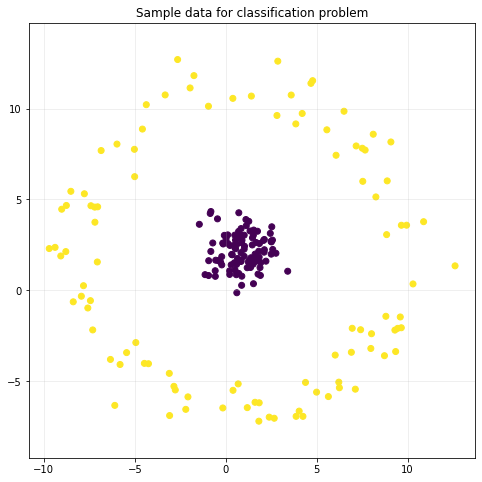

In [15]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
# YOUR CODE HERE
plt.scatter(X[:,0], X[:,1], c=y)
# end plot graph
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

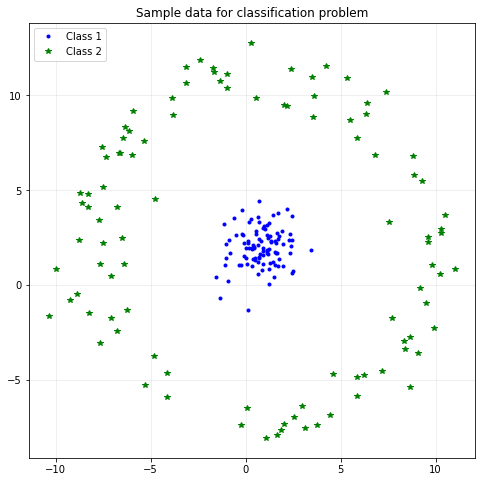

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [16]:
import random

train_size = 0.8

idx_train = None
idx_test = None

X_train = None
X_test = None
y_train = None
y_test = None

# YOUR CODE HERE
random.seed(32)
idx = np.arange(0, X.shape[0])
random.shuffle(idx)
train_len = int(train_size*len(idx))
idx_train = idx[:train_len]
idx_test = idx[train_len:]
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]

In [17]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [128  69 174 199  35  68  34  22 121  36]
train size, X: (160, 2) , y: (160,)
test size,  X: (40, 2) , y: (40,)
success!


**Expected reult (or something similar):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write a function to normalize your $\mathtt{X}$ data

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook's LaTeX equation capabilities to write the normalization equations for your dataset.

YOUR ANSWER HERE

We need to calculate mean of X as $X_{mean}$ and standard deviation of X as $X_{std}$.

$$X_{mean} = \frac{\sum_{i=0}^{len(X)}X[i]}{len(X)}$$

$$X_{std} = \sqrt{\frac{\sum_{i=0}^{len(X)}(X[i] - X_{mean})^2}{len(X)}}$$

$$X_{norm} = \frac{X - X_{mean}}{X_{std}}$$


In [18]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    X_norm = None
    # YOUR CODE HERE
    X_norm = (X - np.mean(X))/np.std(X)
#     print(X_norm[:5,:])
    print(X_norm.max(), X_norm.min())
    return X_norm


In [19]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

2.4778631914073594 -2.411465070777653
(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [20]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1/(1 + np.exp(-z))
        return s

    def softmax(self, z):
        sm = None
        # YOUR CODE HERE
        sm = np.exp(z) / np.sum(np.exp(z))
        return sm
    
    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        z = self.sigmoid(X @ theta.reshape(-1,1))
        hf = z
        return hf
    
    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        grad = -1/len(y) * (X.T @ (y - y_pred))
        return grad
        
    def costFunc(self, theta, X, y):
        cost = None
        grad = None
        # YOUR CODE HERE
        y_pred = self.h(X, theta)
        grad = self.gradient(X, y, y_pred)
        cost = -1/len(y) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        cost, grad = None, None

        for i in range(num_iters):
            # 1. calculate cost, grad function
            # 2. update new theta
            #theta = None
            # YOUR CODE HERE
            cost, grad = self.costFunc(theta, X, y)
            y_pred = self.h(X, theta)
            grad = self.gradient(X, y, y_pred)
            theta = theta - alpha * grad
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hypothesis function
        # 2. classify y_predict that what it should be class1 or class2
        # 3. append the output from prediction
        # YOUR CODE HERE
        y_pred = self.h(X, theta).squeeze()
        labels = np.round(y_pred).astype(int)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_pred = self.predict(X,theta)
        percent_correct = (y_pred==y.squeeze()).astype(int).sum() / len(y_pred) * 100
        return percent_correct

In [21]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [0.8719249134773479, 0.870441756946089, 0.8689666485816598]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expected result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [22]:
alpha = 0.001
iterations = 50000

BGD_model = None
initial_theta = None
bgd_theta, bgd_cost = None, None

# YOUR CODE HERE
# print(X_design_train)
BGD_model = Logistic_BGD()
initial_theta = np.zeros(shape = (X_design_train.shape[1],1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train.reshape(-1,1), initial_theta, alpha, iterations)

Minimum at iteration: 49999


[[ 0.09124996]
 [ 0.00523373]
 [-0.13349893]]
50000
0.6931471805599454


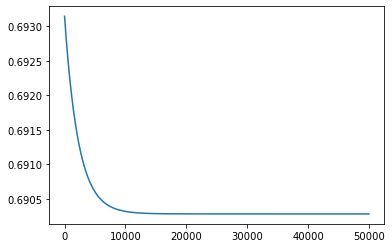

success!


In [23]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expected result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

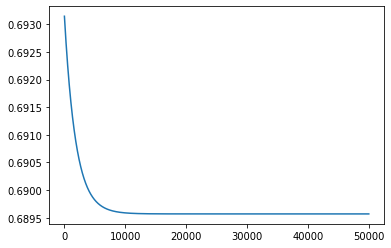

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

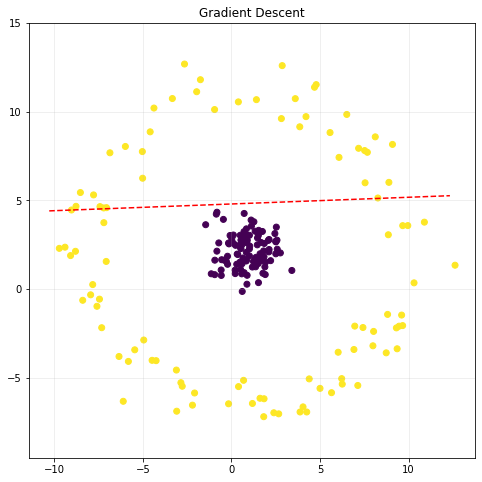

In [24]:
# def boundary_points(X, theta):
#     v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
#     v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
#     dist_ortho = theta[0,0] / v_ortho_length
#     v_orthogonal = v_orthogonal / v_ortho_length
#     v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
#     projections = X @ v_parallel
#     proj_1 = min(projections)
#     proj_2 = max(projections)
#     point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
#     point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
#     return point_1, point_2

# fig1 = plt.figure(figsize=(5,5)) 
# ax = plt.axes() 
# ax.set_aspect(aspect = 'equal', adjustable = 'box')
# plt.title('Gradient Descent')
# plt.grid(axis='both', alpha=.25)
# ax.scatter(X[:,0], X[:,1], c=y)
# point_1, point_2 = boundary_points(X, bgd_theta)
# plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
# # plt.legend(loc=0)
# plt.show()


# YOUR CODE HERE
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Gradient Descent')
plt.grid(axis='both', alpha=.25)
# plot graph here
# YOUR CODE HERE
plt.scatter(X[:,0], X[:,1], c=y)
x1_plot = np.linspace(np.amin(XX[:,0]), np.amax(XX[:,0]), 50)
x2_plot = -(bgd_theta[0] + bgd_theta[1]*x1_plot)/bgd_theta[2]
x1_plot = x1_plot * np.std(X[:,0]) + np.mean(X[:,0])
x2_plot = x2_plot * np.std(X[:,1]) + np.mean(X[:,1])
plt.plot(x1_plot, x2_plot, 'r--')
# end plot graph
plt.axis('equal')
plt.show()

**Expected result (or look alike):**\
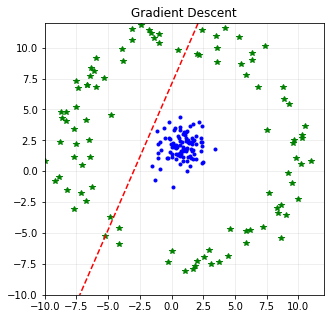

In [25]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 25.0


### Exercise 2.1 (10 points)

Write Newton's method class

In [26]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1/(1 + np.exp(-z))
        return s

    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        z = self.sigmoid(X @ theta.reshape(-1,1))
        hf = z
        return hf

    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        grad = -1/len(y) * (X.T @ (y - y_pred))
        return grad
        
    def hessian(self, X, y, theta):
        hess_mat = None
        # YOUR CODE HERE
        y_pred = self.h(X, theta)
        
        #the resulting output shape is (m,n)
#         x_multiplied_y = X*(y_pred*(1-y_pred)) #not a matrix multiplication, but a vector multiplied with each columns of matrix
#         print('shape should be (m,n)',x_multiplied_y.shape)
#         hess_mat = X.T @ x_multiplied_y
#         print('shape should be (n,n)', hess_mat.shape)
        
        hess_mat = (X.T @ X) * ((y_pred.reshape(-1,1).T)@(1-y_pred.reshape(-1,1)))/X.shape[0]
        
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None
        # YOUR CODE HERE
        y_pred = self.h(X, theta)
        grad = self.gradient(X, y, y_pred)
        cost = -1/len(y) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # YOUR CODE HERE
            cost, grad = self.costFunc(theta, X, y)
            y_pred = self.h(X, theta)
            hessian_mat = self.hessian(X,y,theta)
            inv_hessian = np.linalg.inv(hessian_mat)
            theta = theta - inv_hessian @ grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # YOUR CODE HERE
        y_pred = self.h(X, theta).squeeze()
        labels = np.round(y_pred).astype(int)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_pred = self.predict(X,theta)
        percent_correct = (y_pred==y.squeeze()).astype(int).sum() / len(y_pred) * 100
        return percent_correct

In [27]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[12.17334371  6.55487738]
 [ 6.55487738 14.84880387]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.14765747 0.15607017]]
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845246]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [[ 0.09107046]
 [ 0.00522274]
 [-0.13323205]]
0.6931471805599454


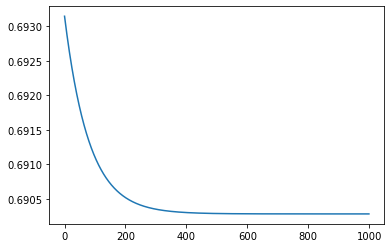

In [28]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train.reshape(-1,1), initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expected result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

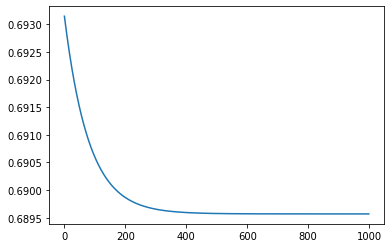

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

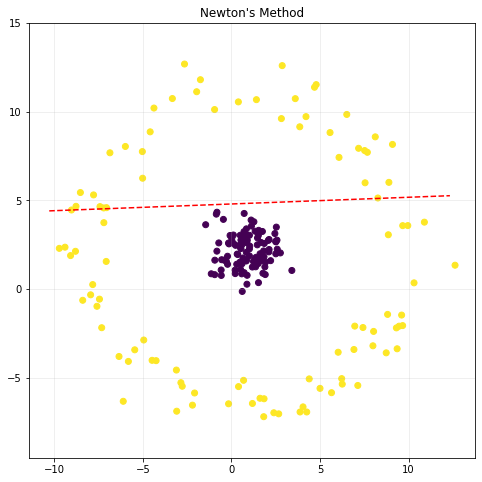

In [29]:
# def boundary_points(X, theta):
#     v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
#     v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
#     dist_ortho = theta[0,0] / v_ortho_length
#     v_orthogonal = v_orthogonal / v_ortho_length
#     v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
#     projections = X @ v_parallel
#     proj_1 = min(projections)
#     proj_2 = max(projections)
#     point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
#     point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
#     return point_1, point_2

# fig1 = plt.figure(figsize=(5,5)) 
# ax = plt.axes() 
# ax.set_aspect(aspect = 'equal', adjustable = 'box')
# plt.title('Gradient Descent')
# plt.grid(axis='both', alpha=.25)
# ax.scatter(X[:,0], X[:,1], c=y)
# point_1, point_2 = boundary_points(X, nm_theta)
# plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
# # plt.legend(loc=0)
# plt.show()


# # YOUR CODE HERE
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title("Newton's Method")
plt.grid(axis='both', alpha=.25)
# plot graph here
# YOUR CODE HERE
plt.scatter(X[:,0], X[:,1], c=y)
x1_plot = np.linspace(np.amin(XX[:,0]),np.amax(XX[:,0]), 50)
x2_plot = -(nm_theta[0] + nm_theta[1]*x1_plot)/nm_theta[2]
x1_plot = x1_plot * np.std(X[:,0]) + np.mean(X[:,0])
x2_plot = x2_plot * np.std(X[:,1]) + np.mean(X[:,1])
plt.plot(x1_plot, x2_plot, 'r--')
# end plot graph
plt.axis('equal')
plt.show()

**Expected result (or look alike):**

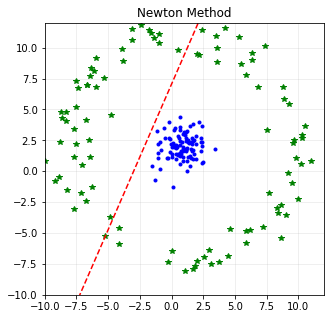

In [30]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,nm_theta))

Accuracy = 25.0


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

YOUR ANSWER HERE

The number of iterations required for logistic regression when alpha is 0.001 is around 10,000 to 15,000 to get a flat curve while the without the need to check the multiple value of learning rate the newton's method took around 600 to 800 to get a flat learning curve. I do not observe any issues with Newton's method for now.

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




In [31]:
#1. Performing polar transformation on the data to obtain a linearly separable dataset
#2. Verfifying that we obtain good classification accuracy for logistic regression with GD or Newton's method
#   after the polar transformation
#3, Apply Newton's method to the dataset you used for the take home exercise

In [32]:
#1
def to_polar(x,y):
    r = np.sqrt(np.square(x) + np.square(y))
    angle = np.arctan(y/x) #return in radian
    return r, angle

In [33]:
r, angle = to_polar(X[:,0], X[:,1])
Xp = np.concatenate((r.reshape(-1,1), angle.reshape(-1,1)), axis=1)
Xpn = normalization(Xp)
Xpp = np.insert(Xpn, 0, 1, axis=1)
Xp_train = Xpp[idx_train]
Xp_test = Xpp[idx_test]
yp_test = y_test
yp_train = y_train

2.640234803493215 -1.2086328101037276


Minimum at iteration: 999
theta: [[-4.2595107 ]
 [ 5.29884125]
 [-1.4659997 ]]
0.4928574258831473


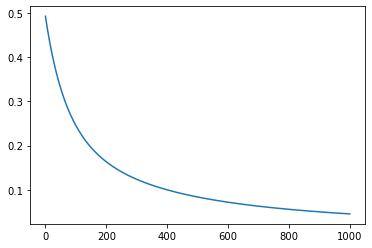

In [34]:
#2
nm = Logistic_NM()
initial_theta = np.ones((Xp_train.shape[1],1))
iterations = 1000

nm_theta, nm_cost = nm.newtonsMethod(Xp_train, yp_train.reshape(-1,1), initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()


In [35]:
print("Accuracy =",nm.getAccuracy(Xp_test, yp_test, nm_theta))

Accuracy = 100.0


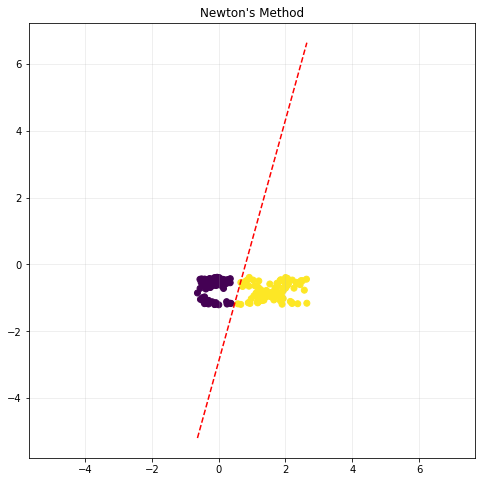

In [36]:
# def boundary_points(X, theta):
#     v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
#     v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
#     dist_ortho = theta[0,0] / v_ortho_length
#     v_orthogonal = v_orthogonal / v_ortho_length
#     v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
#     projections = X @ v_parallel
#     proj_1 = min(projections)
#     proj_2 = max(projections)
#     point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
#     point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
#     return point_1, point_2

# fig1 = plt.figure(figsize=(5,5)) 
# ax = plt.axes() 
# ax.set_aspect(aspect = 'equal', adjustable = 'box')
# plt.title('Gradient Descent')
# plt.grid(axis='both', alpha=.25)
# ax.scatter(X[:,0], X[:,1], c=y)
# point_1, point_2 = boundary_points(Xp, nm_theta)
# plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
# # plt.legend(loc=0)
# plt.show()



# # YOUR CODE HERE
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title("Newton's Method")
plt.grid(axis='both', alpha=.25)
# plot graph here
# YOUR CODE HERE
plt.scatter(Xpn[:,0], Xpn[:,1], c=y)
x1_plot = np.linspace(np.amin(Xpn[:,0]),np.amax(Xpn[:,0]), 50)
x2_plot = -(nm_theta[0] + nm_theta[1]*x1_plot)/nm_theta[2]
# x1_plot = x1_plot * np.std(Xp[:,0]) + np.mean(Xp[:,0])
# x2_plot = x2_plot * np.std(Xp[:,1]) + np.mean(Xp[:,1])
plt.plot(x1_plot, x2_plot, 'r--')
# end plot graph
plt.axis('equal')
plt.show()

### Batch Gradient Descent

Minimum at iteration: 59999
theta: [[-1.32375945]
 [ 4.29675443]
 [ 1.37420215]]
0.4928574258831473


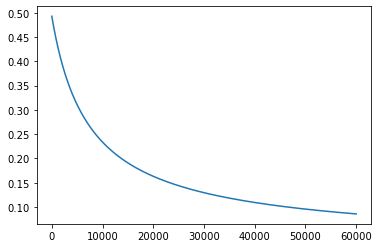

In [37]:
#2
bgd = Logistic_BGD()
initial_theta = np.ones((Xp_train.shape[1],1))
iterations = 60000
alpha = 0.001

bgd_theta, bgd_cost = bgd.gradientAscent(Xp_train, yp_train.reshape(-1,1), initial_theta, alpha, iterations)
print("theta:",bgd_theta)

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()


In [38]:
print("Accuracy =",bgd.getAccuracy(Xp_test, yp_test, bgd_theta))

Accuracy = 100.0


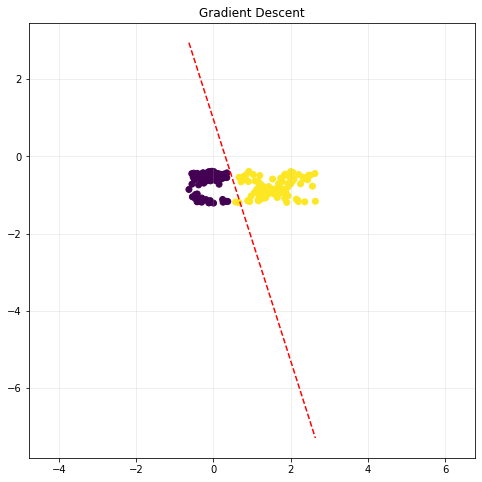

In [39]:
# YOUR CODE HERE
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Gradient Descent')
plt.grid(axis='both', alpha=.25)
# plot graph here
# YOUR CODE HERE
plt.scatter(Xpn[:,0], Xpn[:,1], c=y)
x1_plot = np.linspace(np.amin(Xpn[:,0]),np.amax(Xpn[:,0]), 50)
x2_plot = -(bgd_theta[0] + bgd_theta[1]*x1_plot)/bgd_theta[2]
# x1_plot = x1_plot * np.std(Xp[:,0]) + np.mean(Xp[:,0])
# x2_plot = x2_plot * np.std(Xp[:,1]) + np.mean(Xp[:,1])
plt.plot(x1_plot, x2_plot, 'r--')
# end plot graph
plt.axis('equal')
plt.show()

### Newton's method on my dataset

In [40]:
#3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

data_bean = pd.read_excel('Dry_Bean_Dataset.xlsx')
data_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [41]:
#separating independent columns and dependent column in X and y and normalizing them
X_data = data_bean.drop(columns = 'Class')
y_data = data_bean['Class']

X_norm = (X_data - X_data.min()) / (X_data.max() - X_data.min())

def partition(X, y, percent_train):
    y_labels_name = None
    y_labels_new = None
    
    # YOUR CODE HERE
    
    y_labels_name = y.unique()
#     y_labels_new = [str(i) for i in range(len(y_labels_name))]
    y_labels_new = list(np.arange(len(y_labels_name)))
    
    yy = y.replace(to_replace = y_labels_name, value = y_labels_new, inplace = False)
    
    random.seed(32)
    idx = np.arange(0, X.shape[0])
    random.shuffle(idx)
    train_size = int(len(idx)*percent_train)
    idx_train = idx[0:train_size]
    idx_test = idx[train_size:]
    X_train = X.iloc[idx_train, :].reset_index(drop=True)
    X_test = X.iloc[idx_test, :].reset_index(drop=True)
    y_train = yy.iloc[idx_train].reset_index(drop=True)
    y_test = yy.iloc[idx_test].reset_index(drop=True)
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [42]:
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X_norm, y_data, 0.85)

In [43]:
X_norm.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116


In [44]:
class NM_multiclass:
    def __init__(self):
        pass
    
    def h(self, X, theta):
        a = X @ theta.T
        phi = np.exp(a)
        y_pred = phi/(np.sum(phi, axis = 1)).reshape(-1,1) #shape(m,k)
        return y_pred
        
    def my_J(self, theta, X, y, j, num_class): #for class j
        delta_j = (y == j).astype(int) #shape of y (m,1)
        phi_j = np.squeeze(np.exp(X @ theta[j,:].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
        #phi_j shape(m,)
        cost_j = - np.dot(delta_j.T, np.log(phi_j).reshape(-1,1)) #scalar
        cost = cost_j
        return cost
    
    def my_grad_cost(self, X, y, j, theta, num_class): #for class j
        cost = self.my_J(theta, X, y, j, num_class)
        delta_j = (y == j).astype(int) #(m,1) shape
        phi_j = np.squeeze(np.exp(X @ theta[j].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
        #phi_j (m,)
        grad = (phi_j - delta_j.T) @ X / X.shape[0]  # ycalculated - y_truth, and its averaged over training size
        return grad, cost


    def hessian(self, X, y, theta, j): #for particular class j
        hess_mat = None
        y_pred = self.h(X, theta)
#         print('hessian y_pred', type(y_pred))
        #the resulting output shape is (m,n)
#         x_multiplied_y = X*(y_pred[:,j]*(1-y_pred[:,j])).reshape(-1,1) #not a matrix multiplication, but a vector multiplied with each columns of matrix
    #         print('shape should be (m,n)',x_multiplied_y.shape)
#         hess_mat = X.T @ x_multiplied_y
    #         print('shape should be (n,n)', hess_mat.shape)
        
        hess_mat = (X.T @ X) * ((y_pred[:,j].reshape(-1,1).T)@(1-y_pred[:,j].reshape(-1,1)))/X.shape[0]
        
        return hess_mat


    def newtonsMethod(self, X, y, theta, num_iters, num_class):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cum_cost = 0
            for j in range(num_class):
                grad, cost = self.my_grad_cost(X, y, j, theta, num_class)
                
                y_pred = self.h(X, theta)
                hessian_mat = self.hessian(X, y, theta, j)
                inv_hessian = np.linalg.inv(hessian_mat)
                #grad (1,n)
                #theta[j] (n,)
                theta[j] = theta[j] - np.squeeze(inv_hessian @ grad.T)
                cum_cost +=  cost
            J_history.append(cum_cost[0])
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta, theta_history[J_min_index] , J_history

    def test_function(self,X,y,theta):
        a = X @ theta.T
        phi = np.exp(a)
        phi_n = phi/(np.sum(phi, axis = 1)).reshape(-1,1)
        yhat = np.argmax(phi_n, axis = 1)

        num_correct_pred = (y == yhat).astype(int).sum()
        m_test = len(y)
        accuracy = num_correct_pred / m_test * 100

        return accuracy, yhat

In [45]:
if (X_train.shape[1] == X_data.shape[1]): 
    X_train.insert(0, "intercept", 1)
    
if (X_test.shape[1] == X_data.shape[1]): 
    X_test.insert(0, "intercept", 1)


NM_model = NM_multiclass()

m,n = X_train.shape
num_class = len(y_data.unique())
initial_theta = np.zeros((num_class, n))
iterations = 10


X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

recent_theta, nm_theta, nm_cost = NM_model.newtonsMethod(X_train_np, y_train_np.reshape(-1,1), initial_theta, iterations, num_class)
print("theta:",nm_theta)


Minimum at iteration: 0
theta: [[ 1.04822122e-01 -1.36471686e-01 -7.95829757e-03 -2.05394294e-01
  -3.48013015e-01 -2.35773515e-01  1.19029596e-01  1.57483469e-01
   5.08304590e-01 -1.14568203e-04  2.05894274e-03  1.51925795e-03
  -1.45043486e+00  2.08126014e-02 -5.27705568e-02  1.41856875e+00
   1.87307834e-03]
 [-9.35804718e-02 -4.84673951e-01  8.15802479e-02 -4.24750523e-01
  -4.64601594e-01  9.15693279e-02 -2.22609324e-03  4.20231860e-01
   8.55365725e-01  2.74081166e-04  5.51445967e-03  1.56569038e-03
   2.48188147e-01  3.87991894e-02 -2.58357294e-02 -1.07645483e-01
  -1.45680442e-02]
 [-3.16312210e-03  9.04647695e-02 -9.58114714e-03 -1.54657096e-02
   2.09161081e-02  1.11597143e-02  1.34404253e-03 -5.09354039e-02
  -2.56107283e-02 -9.45790726e-05 -1.02222196e-03 -5.83714126e-04
   1.06199834e-02 -3.32522132e-03  3.04428372e-03 -1.14107386e-02
  -6.15889316e-05]
 [ 4.02312732e-02 -1.51009015e-01 -1.10795659e-01  2.28911141e-01
   1.63961383e-01 -1.02512785e-01 -7.34038976e-03 -2.1

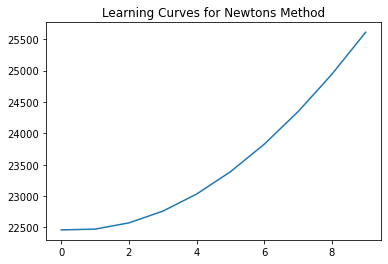

In [46]:
plt.figure()
plt.plot(nm_cost)
plt.title('Learning Curves for Newtons Method')
plt.show()


In [47]:
# nm_theta =  np.zeros((num_class, n))
accuracy,_ = NM_model.test_function(X_test_np, y_test_np, nm_theta)
print("Accuracy (when theta is selected with minimum training error) =",accuracy)
accuracy,_ = NM_model.test_function(X_test_np, y_test_np, recent_theta)
print("Accuracy (when theta obtained after full iteration is performed)=",accuracy)

Accuracy (when theta is selected with minimum training error) = 89.5690499510284
Accuracy (when theta obtained after full iteration is performed)= 89.5690499510284


In [48]:
# theta = theta_arr[1]
accuracy, y_pred = NM_model.test_function(X_test_np, y_test_np, nm_theta)
y = y_test
correct_pred = (y == y_pred)
incorrect_pred = (y != y_pred)

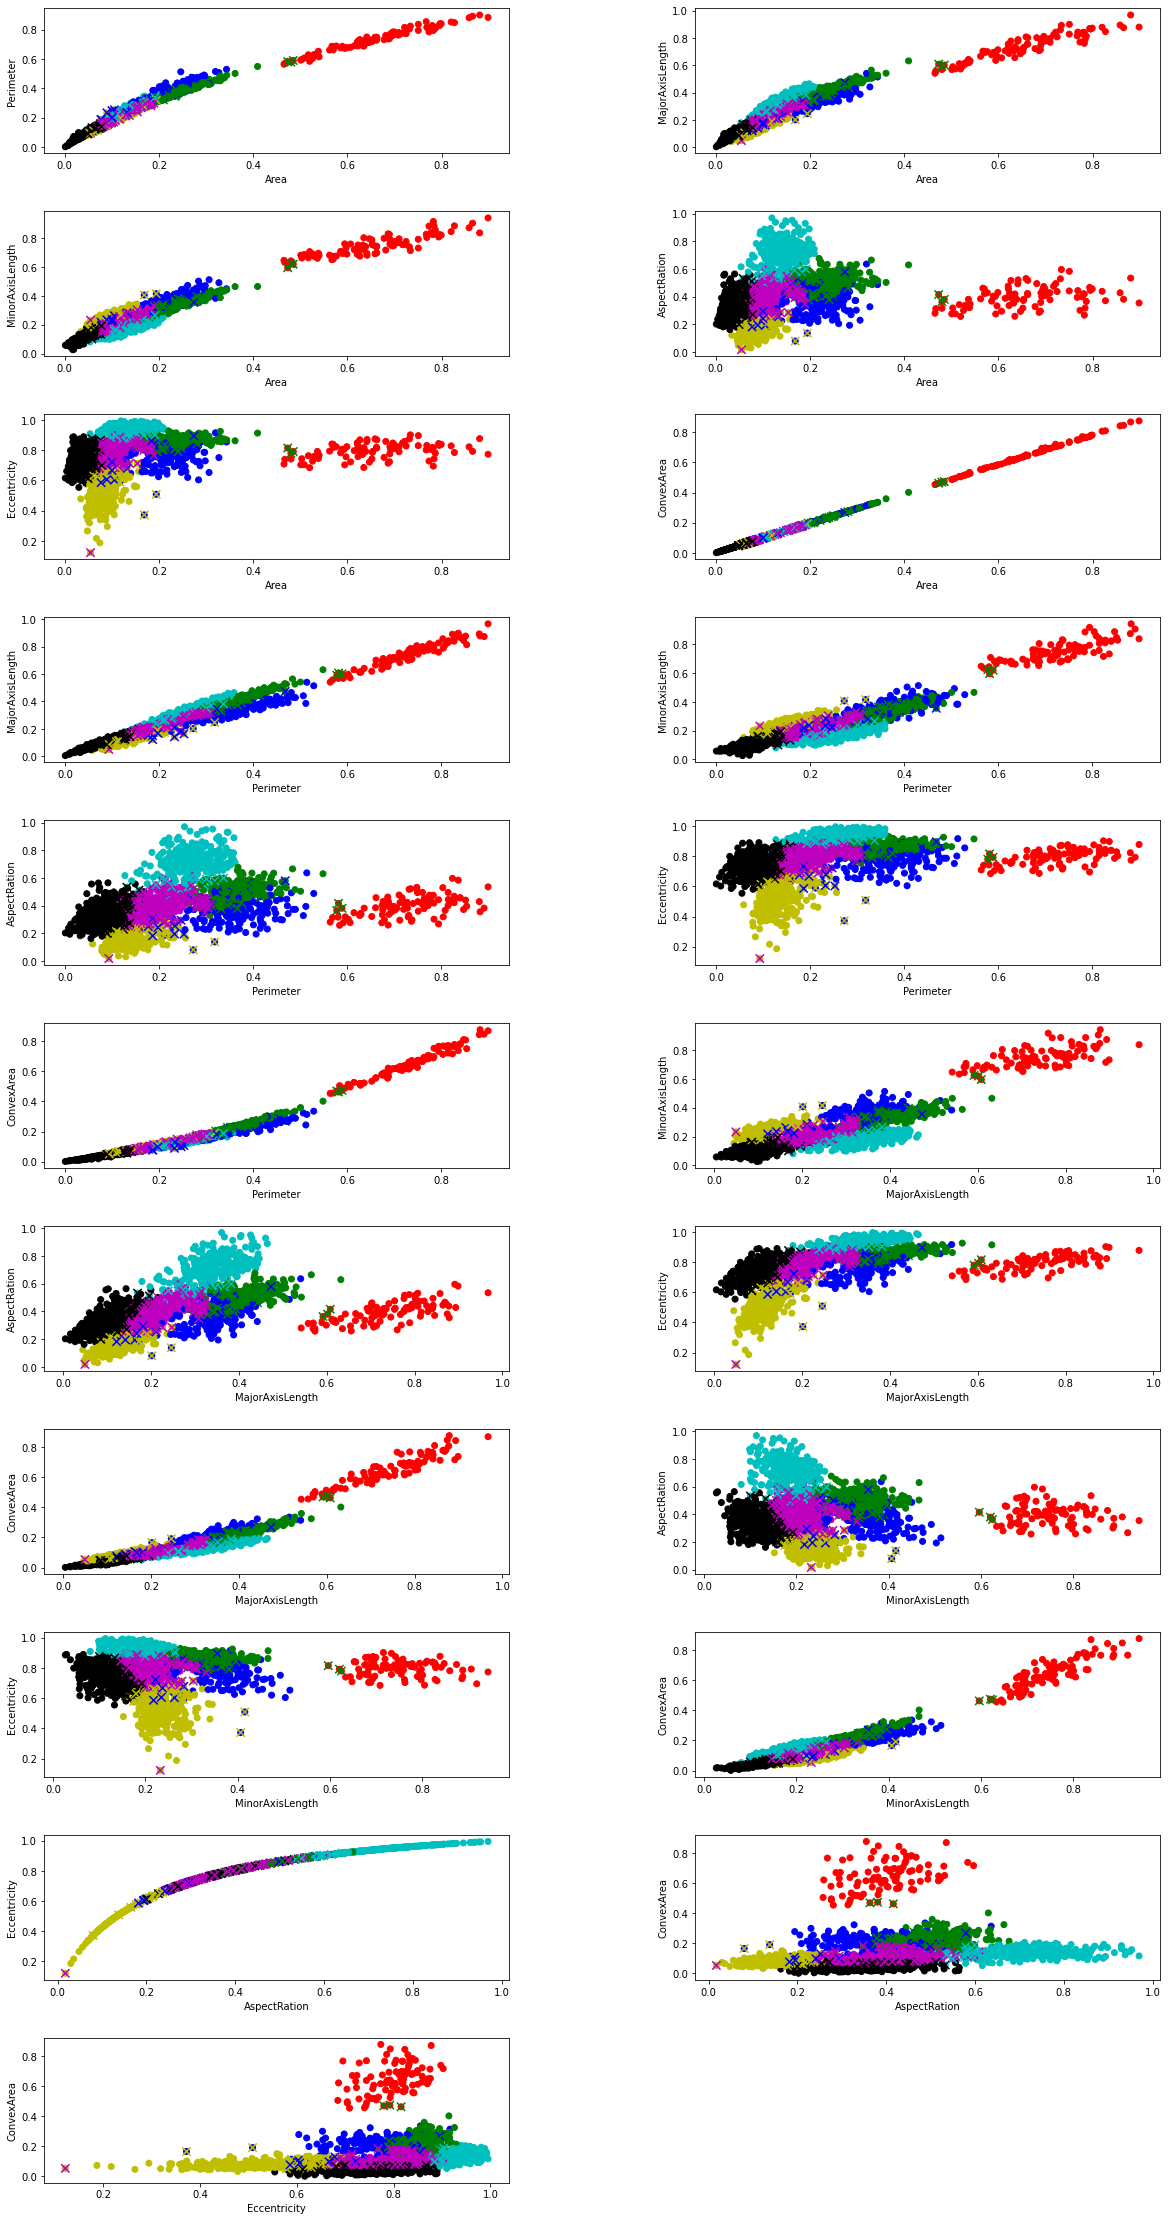

In [49]:
fig = plt.figure(figsize=(20, 40))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = X_test.to_numpy()
columns = X_test.columns.to_numpy()

ytest_color = y_test.replace(to_replace = [0,1,2,3,4,5,6], value=['y','b','r','g', 'c','m','k']).to_numpy()

ypred_series = pd.Series(y_pred)
ypred_c = ypred_series.replace(to_replace = [0,1,2,3,4,5,6], value=['y','b','r','g', 'c','m','k']).to_numpy()
y_xpred_c = ypred_c[incorrect_pred]

X_in = X_test[incorrect_pred].to_numpy()  #incorrect predicted X values

count = 0
for i in range(1,num_class):
    for j in range(i+1, num_class+1):
        ax = fig.add_subplot(11, 2, count+1)
        ax.scatter(X[:,i], X[:,j], c = ytest_color)
        ax.scatter(X_in[:,i], X_in[:,j], c = y_xpred_c, marker = 'x', s = 70, linewidths =0.1)
        ax.set_xlabel(columns[i])
        ax.set_ylabel(columns[j])
        count += 1
plt.show()

In [50]:
#percentage error for each class
eachclass_count = y_test.value_counts()
correct_count_arr = []
for each_class in range(0,num_class):
    correct = ((y_test == each_class) & (y_pred == each_class)).sum()
    print(f"Percentage accuracy of class {y_labels_name[each_class]} is: {correct/eachclass_count[each_class]*100}")


Percentage accuracy of class SEKER is: 90.53627760252367
Percentage accuracy of class BARBUNYA is: 83.98058252427184
Percentage accuracy of class BOMBAY is: 96.93877551020408
Percentage accuracy of class CALI is: 91.12903225806451
Percentage accuracy of class HOROZ is: 94.48529411764706
Percentage accuracy of class SIRA is: 89.13043478260869
Percentage accuracy of class DERMASON is: 86.86679174484053


## The report

Write a brief report covering your experiments (both in lab and take home) and submit the Jupyter notebook via JupyterHub at https://puffer.cs.ait.ac.th before the next lab.

In your solution, be sure to follow instructions!

### Discussion

**Polar Transformation of Dataset**

Our dataset is circularly distributed, with different average value of radius for each class. This makes these two classes separable if we have circular boundary. Since, logistic regression can provide us with only linear boundary, we cannot properly classify our datasets into two classes. Though we cannot apply logistic regression model to this dataset, we can alter our dataset by using the polar transformation which transforms this circularly distributed dataset to linear form and thus this two classes can be easily separated by training our simple logistic regression model, without needing some complicated model.

After applying polar transformation, the new dataset has radius and angle (in radian) as two features, obtained by following equations:

$$radius(r) = \sqrt{x^2 + y^2}$$

$$angle(\theta) = \tan^{-1}\frac{y}{x}$$

In our case, $x$ and $y$ represent two features $X[:,0]$ and $X[:,1]$.



**Training this new dataset by using Newton's Method and Batch Gradient Descent Algorithm**

Using Newton's method, we do not have to train multiple times in order to select appropriate value of learning rate. Here the training equation consist of Inverse of Hessian matrix (all possible second order partial derivative of cost function with respect to theta). But for logistic regression we need to check the learning rate. This is the most important feature of Newton's method. But it has downside because of the inverse of hessian matrix. Sometimes if hessian matrix is singular or near to singular (zero determinant value) result the inverse to be pretty large.

Another part is number of iterations required. Yes, the number of iterations required by the logistic regression model trained by using Batch gradient descent depend upon the learning rate. Despite that, the newton's method converges our model faster than the Gradient descent algorithm and we do not have to even worry about choosing appropriate value of learning rate. In the second experiment where the dataset was tranformed using polar transformation, the iteration of about 100 results in 100% accuracy in test sets using Newton's method, while the iterations of 8000 results in 100% accuracy using Gradient Descent method. This is pretty significant. Yes, the number of iterations can be minimized by choosing larger learning rate in case of Gradient Descent algorithm.

Comparing to the original dataset, the result is, of course, 100% when we train our model by transforming dataset using polar transformation because it's obvious that the new tranformed dataset is easily separated by a straight boundary line.


**Using Newton's Method to train Multinomial Logistic Regression model for our Multiclass Classification Problem**

The preprocessing of the dataset is same as in previous lab. Here I used Newton's Method in order to train the Multinomial Logistic Regression Model in order to compare with the previous Batch Gradient Descent Method to get the optimum model parameters. While training the model using Newton's method, I was shocked to know the number of iterations required to acheive the model performance of 88% equal to the previous method which required 20,000 iterations. I thought and guessed it might be around 5000, after comparing from the made up dataset practiced in the lab. But no, surprisingly, the model gets trained to its optimum parameters at a single iterations. Yes, just a single iteration makes the model learn its optimum parameters. The learning curve starts ascending with the increase in number of iterations.\
But what about the model performance in new unseen dataset. The model performed even better than the previous model trained by using Gradient Descent to about 20,000 iterations. The accuracy percentage is 89%. And the percentage accuracy for each class is:\
Percentage accuracy of class SEKER is: 90.53627760252367\
Percentage accuracy of class BARBUNYA is: 83.98058252427184\
Percentage accuracy of class BOMBAY is: 96.93877551020408\
Percentage accuracy of class CALI is: 91.12903225806451\
Percentage accuracy of class HOROZ is: 94.48529411764706\
Percentage accuracy of class SIRA is: 89.13043478260869\
Percentage accuracy of class DERMASON is: 86.86679174484053


The Multinomial Logistic regression trained by using Gradient Descent Algorithm has classified the Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira bean varieties with:

Percentage accuracy of class SEKER is: 88.95899053627761\
Percentage accuracy of class BARBUNYA is: 83.98058252427184\
Percentage accuracy of class BOMBAY is: 98.9795918367347\
Percentage accuracy of class CALI is: 87.5\
Percentage accuracy of class HOROZ is: 92.64705882352942\
Percentage accuracy of class SIRA is: 87.77173913043478\
Percentage accuracy of class DERMASON is: 84.05253283302065

The performance of the model trained using NM algorithm outperforms the model trained on BGD algorithm by few percentage for every class but for one class, SEKER, represented by red dots., which it underpermed by 2%. Despite this, the Newton's Method algorithm is best than the Gradient Descent Algorithm, at least for this case or dataset.